## Wstęp do uczenia maszynowego - projekt 1 milestone 2 
### Inżynieria cech i wstępne modelowanie.

Nasz projekt ma na celu predykcjię zarobków pracowników. Zadanie dotyczy binarnej klasyfikacji - czy pracownik zarabia >50K czy <=50K rocznie.

### Wczytanie pakietów

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib 
import random

### Import danych

In [ ]:
df = pd.read_csv("census_income_dataset.csv", )

### Dane brakujące i ograniczenie liczby obserwacji

In [ ]:
df = df.replace('?',np.nan).replace(-100000, np.nan)
df.isna().sum()

age                  0
workclass         2799
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     857
income_level         0
dtype: int64

Jak widzimy, wśród naszych danych brakuje pewnych informacji. Zważywaszy na to, że obserwacji jest dużo i musimy ograniczyć liczbę rekordów, postanowiliśmy zrobić 2 w 1 - pozbędziemy się rekordów z brakami.

In [ ]:
df_incomes = df.copy()
df_incomes.dropna(subset=['workclass', 'native_country', 'occupation'], inplace=True)
df_incomes.reset_index(drop=True, inplace=True)
df_incomes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45222 entries, 0 to 45221
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             45222 non-null  int64  
 1   workclass       45222 non-null  object 
 2   fnlwgt          45222 non-null  float64
 3   education       45222 non-null  object 
 4   education_num   45222 non-null  int64  
 5   marital_status  45222 non-null  object 
 6   occupation      45222 non-null  object 
 7   relationship    45222 non-null  object 
 8   race            45222 non-null  object 
 9   sex             45222 non-null  object 
 10  capital_gain    45222 non-null  float64
 11  capital_loss    45222 non-null  float64
 12  hours_per_week  45222 non-null  float64
 13  native_country  45222 non-null  object 
 14  income_level    45222 non-null  object 
dtypes: float64(4), int64(2), object(9)
memory usage: 5.2+ MB


Wciąż musimy ograniczyć liczbę rekordów. Nasze obserwacje są od siebie niezależne, więc po prostu wylosujmy z nich próbkę o liczności 5000.

In [ ]:
size = df_incomes.shape[0]
rows = 5000
random.seed(1217)
sample_rows = random.sample(range(0,size), rows)
df_incomes = df_incomes.iloc[sample_rows,:]
df_incomes.reset_index(drop=True, inplace=True)
df_incomes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             5000 non-null   int64  
 1   workclass       5000 non-null   object 
 2   fnlwgt          5000 non-null   float64
 3   education       5000 non-null   object 
 4   education_num   5000 non-null   int64  
 5   marital_status  5000 non-null   object 
 6   occupation      5000 non-null   object 
 7   relationship    5000 non-null   object 
 8   race            5000 non-null   object 
 9   sex             5000 non-null   object 
 10  capital_gain    5000 non-null   float64
 11  capital_loss    5000 non-null   float64
 12  hours_per_week  5000 non-null   float64
 13  native_country  5000 non-null   object 
 14  income_level    5000 non-null   object 
dtypes: float64(4), int64(2), object(9)
memory usage: 586.1+ KB


Otrzymaliśmy to co chcieliśmy - 5000 obserwacji bez brakujących danych.

### Ograniczenie liczby cech

Teraz zajmiemy się ogranczeniem liczby cech. Musmi zdecydować, które z nich są użyteczne i wartościowe dla naszego modelu.

In [ ]:
df_incomes['native_country'].value_counts()

United-States                 4587
Mexico                          92
Philippines                     33
Puerto-Rico                     23
China                           21
Germany                         18
Canada                          16
Cuba                            14
Dominican-Republic              13
England                         12
El-Salvador                     12
India                           12
Peru                            11
Guatemala                       10
Portugal                        10
Poland                           9
Japan                            9
South                            9
Vietnam                          8
Columbia                         8
Italy                            7
Jamaica                          6
Trinadad&Tobago                  5
Taiwan                           5
Iran                             5
Ecuador                          5
France                           5
Haiti                            4
Honduras            

Jak widzimy, zmienna `native_country` dla ponad 90% obserwacji przyjmuje wartość 'United-States'. Mozemy więc uznać, że nie będzie ona zbyt wartościowa. 

In [ ]:
df_incomes.shape[0] - df_incomes[df_incomes == 0].count()

age               5000
workclass         5000
fnlwgt            5000
education         5000
education_num     5000
marital_status    5000
occupation        5000
relationship      5000
race              5000
sex               5000
capital_gain       415
capital_loss       244
hours_per_week    5000
native_country    5000
income_level      5000
dtype: int64

Zmienne `capital_gain` oraz `capital_loss` jedynie w mniej niż 10% obserwacji przyjmują wartości niezerowe, a nawet wówczas nie rozdzielają wyraźnie klas - cechy te również nie przydadzą nam się.

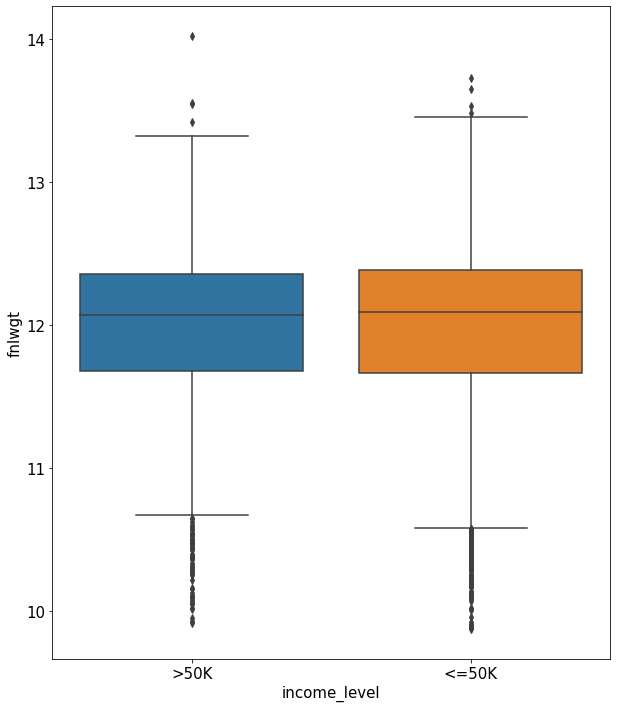

In [ ]:
sns.boxplot(x = df_incomes['income_level'], y = np.log1p(df_incomes['fnlwgt']))
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


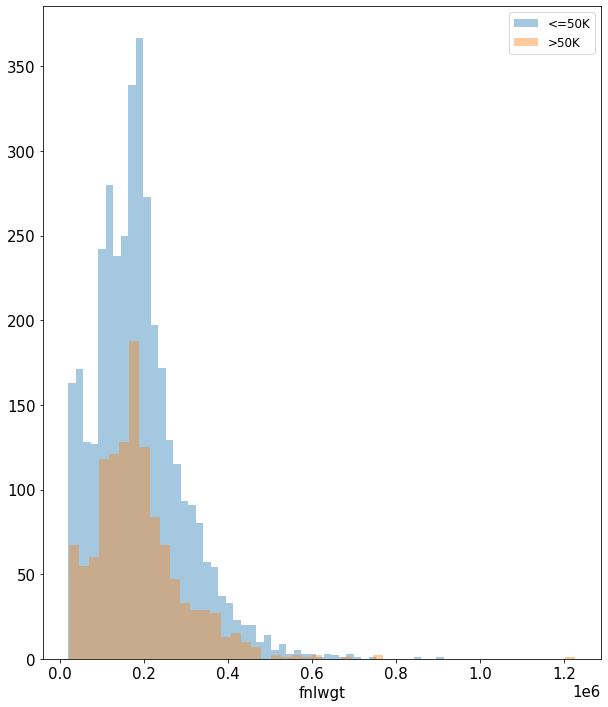

In [ ]:
sns.distplot(df_incomes[df_incomes.income_level=="<=50K"]['fnlwgt'],kde=False,label='<=50K')
sns.distplot(df_incomes[df_incomes.income_level==">50K"]['fnlwgt'],kde=False,label='>50K')
plt.legend(prop={'size': 12})
plt.show()

Zmienna `fnlwgt` ma prawie identyczne boxploty i rozkłady dla obu klas - nie będzie zbyt przydatna.

In [ ]:
df_incomes[['education', 'education_num']].drop_duplicates().sort_values(by = 'education_num', ascending = False)

,education,education_num
23,Doctorate,16
30,Prof-school,15
26,Masters,14
10,Bachelors,13
34,Assoc-acdm,12
8,Assoc-voc,11
0,Some-college,10
3,HS-grad,9
14,12th,8
73,11th,7


Z EDA wiemy, że istnieje bardzo silna korelacja między zmiennymi `education` i `education_num` - odpowiadają one sobie wzajemnie. Możemy zatem bez straty na jakości pozbyć się jednej zmiennej. Usuńmy z ramki cechę `education`, dlatego, że dążymy do pracy na zmiennych numerycznych.

Pozbądźmy się zatem nieprzydatnych zmiennych z naszej ramki danych.



In [ ]:
df_incomes.drop(['native_country', 'capital_gain', 'capital_loss', 'fnlwgt', 'education'], axis=1, inplace=True)
df_incomes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             5000 non-null   int64  
 1   workclass       5000 non-null   object 
 2   education_num   5000 non-null   int64  
 3   marital_status  5000 non-null   object 
 4   occupation      5000 non-null   object 
 5   relationship    5000 non-null   object 
 6   race            5000 non-null   object 
 7   sex             5000 non-null   object 
 8   hours_per_week  5000 non-null   float64
 9   income_level    5000 non-null   object 
dtypes: float64(1), int64(2), object(7)
memory usage: 390.8+ KB


### Grupowanie i outlirery 

Z EDA dokonanego na poprzednim etapie pracy wynika, że w zbiorze nie można wyróżnić żadnych wartości odstających. 

Warto natomiast sprawdzić, czy podział cech: wiek oraz liczba godzin tygodniowo na grupy jest możliwy i czy wspomoże nas w dalszym modelowaniu.

In [ ]:
def age_grouper(x):
  if x<30:  return 'young'
  if x<50:  return 'middle'
  return  'old'
df_incomes['age_group'] = df_incomes.age.apply(lambda x: age_grouper(x))
df_incomes['age_group'].value_counts()

middle    2515
young     1433
old       1052
Name: age_group, dtype: int64

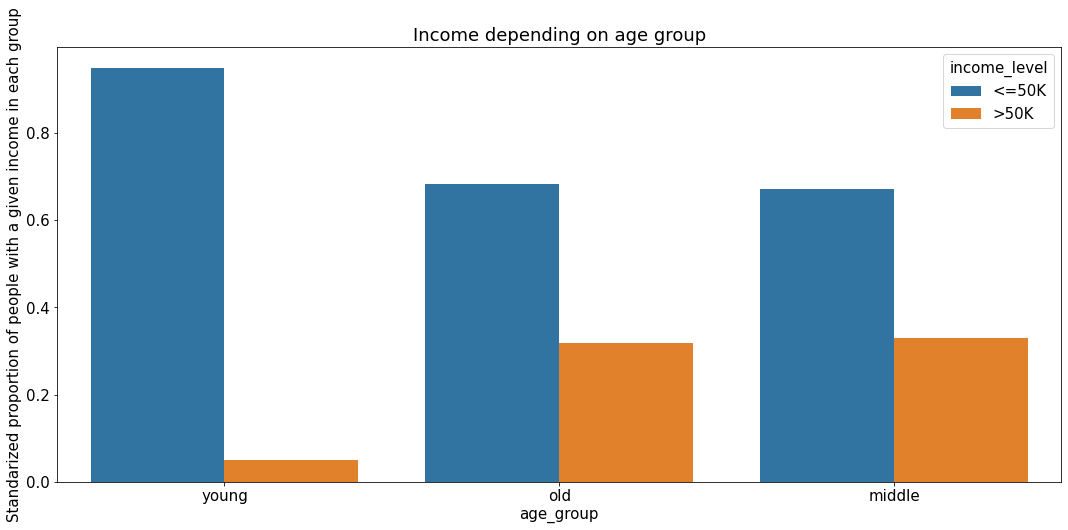

In [ ]:
data = df_incomes.groupby(['income_level', 'age_group']).agg(['count'])['age']
data_for_plot = data / data.groupby(level=1).sum()
data_for_plot = data_for_plot.reset_index().sort_values(by=['income_level','count'], ascending=[True,False])

fig, ax = plt.subplots()
sns.barplot(data = data_for_plot, x='age_group', y='count', hue='income_level')
fig.set_size_inches(18,8)
plt.ylabel('Standarized proportion of people with a given income in each group')
plt.title("Income depending on age group")
plt.show()

In [ ]:
def hours_grouper(x):
  if x<35:  return 'small'
  if x<50:  return 'middle'
  return  'big'
df_incomes['hours_group'] = df_incomes.hours_per_week.apply(lambda x: hours_grouper(x))
df_incomes['hours_group'].value_counts()

middle    3148
big       1052
small      800
Name: hours_group, dtype: int64

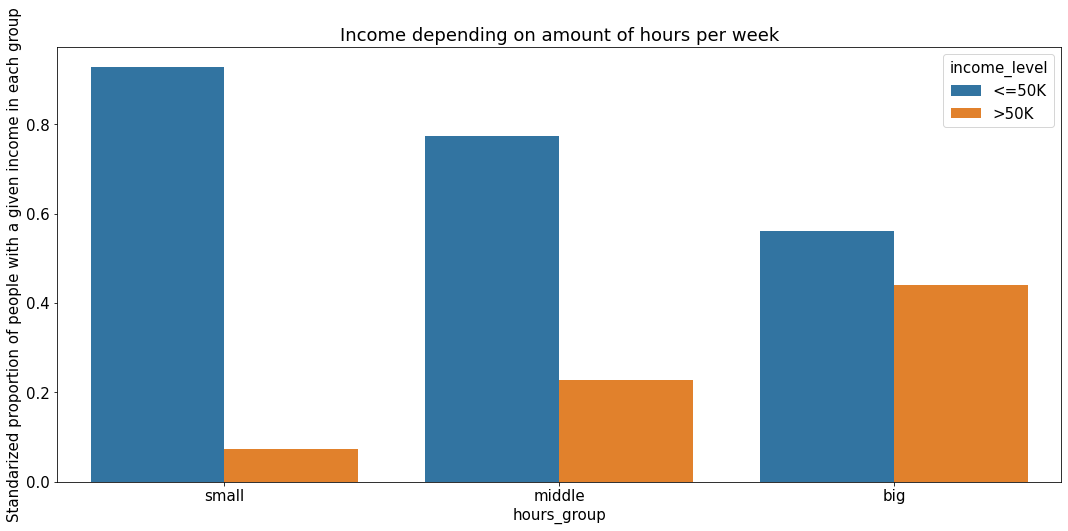

In [ ]:
data = df_incomes.groupby(['income_level', 'hours_group']).agg(['count'])['age']
data_for_plot = data / data.groupby(level=1).sum()
data_for_plot = data_for_plot.reset_index().sort_values(by=['income_level','count'], ascending=[True,False])

fig, ax = plt.subplots()
sns.barplot(data = data_for_plot, x='hours_group', y='count', hue='income_level')
fig.set_size_inches(18,8)
plt.ylabel('Standarized proportion of people with a given income in each group')
plt.title("Income depending on amount of hours per week")
plt.show()

Oba grupowania dały podobny efekt. Godziny w tygodniu lepiej pokazują trend. Jednak w obu grupowaniach pierwsza grupa ukazuje największą dysproporcję.

### Kodowanie cech kategorycznych

Po przekształceniu wśród naszych danych wciąż mamy 6 cech kategorycznych - `workclass`, `marital_status`, `occuaption`, `relationship`, `race` i `sex`. Musimy zakodować je używając zmiennych numrycznych. Do tego celu wykorzystamy One-Hot Encoding.

W ramach eksperymentu stworzymy dwie zakodowane ramki danych: zwykłą i taką, gdzie zmienne age oraz hours_per_week zostały pogrupowane.

In [ ]:
categorical_columns = ['workclass', 'marital_status', 'occupation', 'relationship', 'race', 'sex']
categorical_columns_grouped = ['workclass', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'age_group', 'hours_group']

df_incomes_grouped = df_incomes.drop(['age', 'hours_per_week'], axis = 1)
df_incomes = df_incomes.drop(['age_group', 'hours_group'], axis = 1)

Jak widać, rozdzieliliśmy obie ramki.

In [ ]:
df_incomes.head(2)

,age,workclass,education_num,marital_status,occupation,relationship,race,sex,hours_per_week,income_level
0,43,Private,10,Married-civ-spouse,Exec-managerial,Husband,White,Male,40.0,>50K
1,27,Private,10,Never-married,Adm-clerical,Not-in-family,Black,Female,40.0,<=50K


In [ ]:
df_incomes_grouped.head(2)

,workclass,education_num,marital_status,occupation,relationship,race,sex,income_level,age_group,hours_group
0,Private,10,Married-civ-spouse,Exec-managerial,Husband,White,Male,>50K,middle,middle
1,Private,10,Never-married,Adm-clerical,Not-in-family,Black,Female,<=50K,young,middle


In [ ]:
df_encoded = pd.get_dummies(data = df_incomes, columns = categorical_columns)
df_encoded_grouped = pd.get_dummies(data = df_incomes_grouped, columns = categorical_columns_grouped)
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 45 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   age                                   5000 non-null   int64  
 1   education_num                         5000 non-null   int64  
 2   hours_per_week                        5000 non-null   float64
 3   income_level                          5000 non-null   object 
 4   workclass_Federal-gov                 5000 non-null   uint8  
 5   workclass_Local-gov                   5000 non-null   uint8  
 6   workclass_Private                     5000 non-null   uint8  
 7   workclass_Self-emp-inc                5000 non-null   uint8  
 8   workclass_Self-emp-not-inc            5000 non-null   uint8  
 9   workclass_State-gov                   5000 non-null   uint8  
 10  workclass_Without-pay                 5000 non-null   uint8  
 11  marital_status_Di

Teraz zmapujmy nasz target na zmienną binarną (0 odpowiada zarobkom <=50K, a 1 zarobkom >50K rocznie).

In [ ]:
incomes = {'<=50K':0, '>50K':1}
df_encoded['income_level'] = df_encoded['income_level'].map(incomes)
df_encoded_grouped['income_level'] = df_encoded_grouped['income_level'].map(incomes)
df_encoded_grouped.head(2)

,education_num,income_level,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,marital_status_Divorced,marital_status_Married-AF-spouse,marital_status_Married-civ-spouse,marital_status_Married-spouse-absent,marital_status_Never-married,marital_status_Separated,marital_status_Widowed,occupation_Adm-clerical,occupation_Armed-Forces,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,relationship_Husband,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Female,sex_Male,age_group_middle,age_group_old,age_group_young,hours_group_big,hours_group_middle,hours_group_small
0,10,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0
1,10,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0


### Wstępne modelowanie

Wyodrębnijmy target i cechy.

In [ ]:
y = np.array(df_encoded['income_level'])
X = df_encoded.drop(['income_level'], axis = 1)

In [ ]:
y_grouped = np.array(df_encoded_grouped['income_level'])
X_grouped = df_encoded_grouped.drop(['income_level'], axis = 1)

#### Modele

Przeprowadzamy pierwszą próbę modelowania, trenując kilka prostych modeli na naszych danych.

Zacznijmy od zaimportowania kilku modeli (i funkcji pomocniczych).

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier
from sklearn import  tree

treed = tree.DecisionTreeClassifier(max_depth = 3,
                              random_state = 1)
lr = LogisticRegression(max_iter=1500)
gb = GaussianNB()
bag = BaggingClassifier(base_estimator = treed,
                        n_estimators=20, random_state=0)


Teraz przetestujemy nasze modele na obu ramkach.

In [ ]:
def model_testing(X,y):
  
  X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)
  #Trening
  gb.fit(X_train, y_train)
  lr.fit(X_train, y_train)
  treed.fit(X_train, y_train)
  bag.fit(X_train, y_train)
  tree.plot_tree(treed)
  #Tworzymy zbiór walidacyjny
  X_train_val=pd.concat((X_train,X_val))
  y_train_val=np.concatenate((y_train,y_val), axis=0)
  #Tworzymy tablice z wynikami kroswalidacji
  cvgaussian = cross_val_score(gb, X_train_val, y_train_val, scoring='accuracy', cv = 20)
  cvtree = cross_val_score(treed, X_train_val, y_train_val, scoring='accuracy', cv = 20)
  cvbag = cross_val_score(bag, X_train_val, y_train_val, scoring='accuracy', cv = 20)
  cvreg = cross_val_score(lr, X_train_val, y_train_val, scoring='accuracy', cv = 20)
  
  crossvalidations = pd.DataFrame({'Naive_Bayes': cvgaussian,
                                 'Decision_Tree': cvtree,
                                 'Bagging':cvbag,
                                 'Logistic_Regression': cvreg
                                 })
  crossvalidations = pd.melt(crossvalidations)
  return crossvalidations


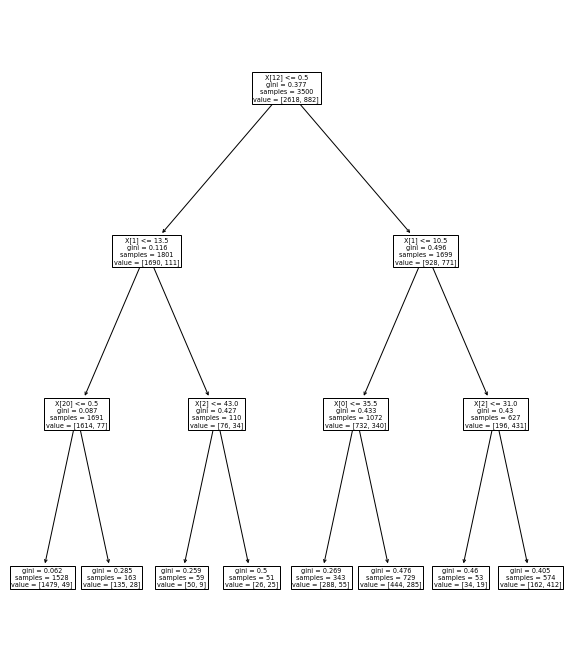

In [ ]:
crossvalidations = model_testing(X,y)
crossvalidations['type'] = ['normal'] * 80

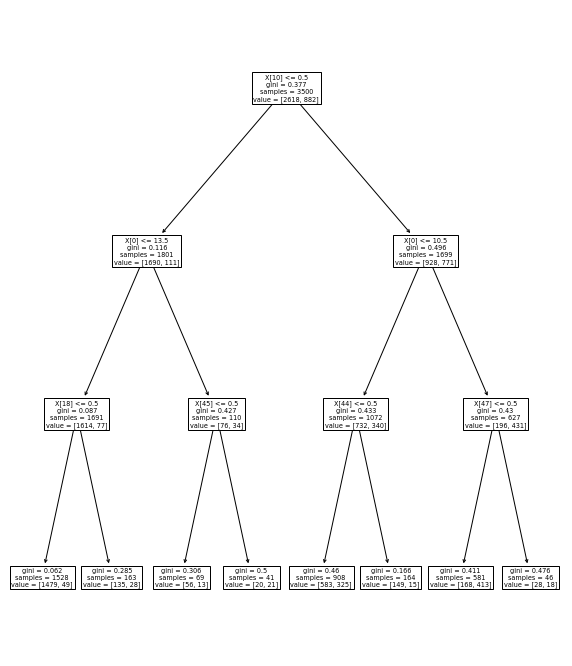

In [ ]:
crossvalidations_grouped = model_testing(X_grouped,y_grouped)
crossvalidations_grouped['type'] = ['grouped'] * 80

Łączymy obie ramki i porównujemy wyniki na wykresie

In [ ]:
crossvalidations = pd.concat((crossvalidations,crossvalidations_grouped))

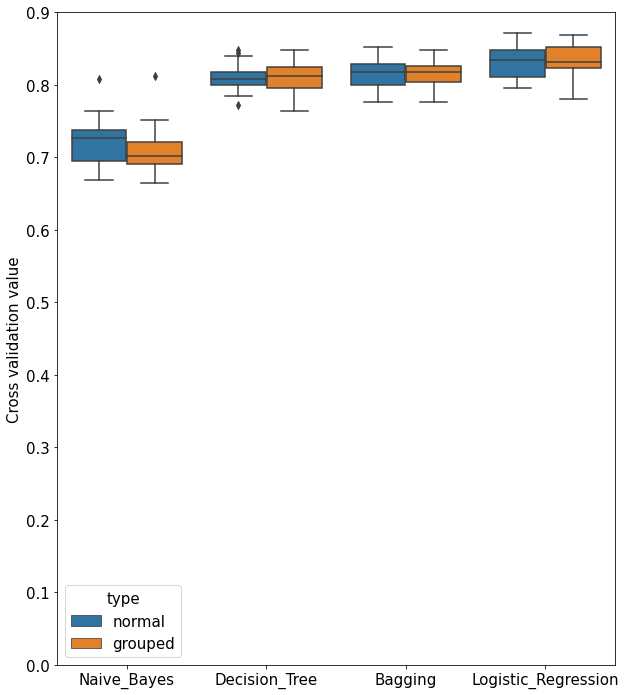

In [ ]:
ax = sns.boxplot(data = crossvalidations, 
                 x = crossvalidations.variable, y = crossvalidations.value, hue = crossvalidations.type
                  )
ax.set(ylim = (0,0.9))
matplotlib.rcParams['figure.figsize'] = [10,12]
matplotlib.rcParams.update({'font.size': 15})
plt.ylabel("Cross validation value")
plt.xlabel("")
plt.show()

Jak widać naiwny model bayesowski zdecydowanie odstaje od reszty.
Pogrupowanie danych w tym przypadku zmienia jedynie ich rozrzut, a nie ogólny wynik.